<a href="https://colab.research.google.com/github/AlexMcLaughlin1/Finding-similar-Net-Energy-Demand-Profiles/blob/main/AutoEncoder_%26_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Creating Convolutional Network and KNN Classifier to find Similar Days Net Demand



In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('d3netdemand') # import data created in 'A3 r script Final'
data.drop('Unnamed: 0', axis =1, inplace = True)
data.head()


,netdemand_23:00:00,netdemand_23:30:00,netdemand_00:00:00,netdemand_00:30:00,netdemand_01:00:00,netdemand_01:30:00,netdemand_02:00:00,netdemand_02:30:00,netdemand_03:00:00,netdemand_03:30:00,...,netdemand_19:00:00,netdemand_19:30:00,netdemand_20:00:00,netdemand_20:30:00,netdemand_21:00:00,netdemand_21:30:00,netdemand_22:00:00,netdemand_22:30:00,trade_date,cluster
0,3730.0,3617.0,3486.0,3348.0,3221.0,3104.0,2995.0,2923.0,2876.0,2846.0,...,5264.0,5103.0,4927.0,4782.0,4640.0,4405.0,4183.0,3945.0,02/01/2019,2
1,3789.0,3640.0,3456.0,3297.0,3173.0,3060.0,2986.0,2929.0,2899.0,2896.0,...,5044.0,4883.0,4721.0,4534.0,4359.0,4063.0,3779.0,3520.0,03/01/2019,2
2,3315.0,3144.0,2913.0,2726.0,2596.0,2496.0,2513.0,2546.0,2536.0,2513.0,...,4679.0,4474.0,4270.0,4011.0,3770.0,3535.0,3306.0,3125.0,04/01/2019,2
3,3006.0,2925.0,2786.0,2647.0,2525.0,2335.0,2204.0,2086.0,1964.0,1910.0,...,4455.0,4280.0,4160.0,4058.0,3900.0,3737.0,3553.0,3334.0,05/01/2019,2
4,3254.0,3170.0,3046.0,2952.0,2842.0,2725.0,2639.0,2539.0,2498.0,2494.0,...,3851.0,3661.0,3499.0,3304.0,3084.0,2829.0,2668.0,2501.0,06/01/2019,1


In [ ]:
data.iloc[:,0:48]

,netdemand_23:00:00,netdemand_23:30:00,netdemand_00:00:00,netdemand_00:30:00,netdemand_01:00:00,netdemand_01:30:00,netdemand_02:00:00,netdemand_02:30:00,netdemand_03:00:00,netdemand_03:30:00,...,netdemand_18:00:00,netdemand_18:30:00,netdemand_19:00:00,netdemand_19:30:00,netdemand_20:00:00,netdemand_20:30:00,netdemand_21:00:00,netdemand_21:30:00,netdemand_22:00:00,netdemand_22:30:00
0,3730.0,3617.0,3486.0,3348.0,3221.0,3104.0,2995.0,2923.0,2876.0,2846.0,...,5572.0,5411.0,5264.0,5103.0,4927.0,4782.0,4640.0,4405.0,4183.0,3945.0
1,3789.0,3640.0,3456.0,3297.0,3173.0,3060.0,2986.0,2929.0,2899.0,2896.0,...,5346.0,5207.0,5044.0,4883.0,4721.0,4534.0,4359.0,4063.0,3779.0,3520.0
2,3315.0,3144.0,2913.0,2726.0,2596.0,2496.0,2513.0,2546.0,2536.0,2513.0,...,4985.0,4854.0,4679.0,4474.0,4270.0,4011.0,3770.0,3535.0,3306.0,3125.0
3,3006.0,2925.0,2786.0,2647.0,2525.0,2335.0,2204.0,2086.0,1964.0,1910.0,...,4795.0,4638.0,4455.0,4280.0,4160.0,4058.0,3900.0,3737.0,3553.0,3334.0
4,3254.0,3170.0,3046.0,2952.0,2842.0,2725.0,2639.0,2539.0,2498.0,2494.0,...,4208.0,4051.0,3851.0,3661.0,3499.0,3304.0,3084.0,2829.0,2668.0,2501.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1198.0,1029.0,868.0,643.0,560.0,506.0,478.0,510.0,477.0,544.0,...,1512.0,1406.0,1333.0,1379.0,1427.0,1551.0,1632.0,1407.0,1249.0,1115.0
1050,1068.0,890.0,729.0,632.0,610.0,552.0,538.0,528.0,518.0,521.0,...,1245.0,1151.0,1090.0,1088.0,1089.0,1170.0,1187.0,1075.0,896.0,785.0
1051,660.0,514.0,505.0,496.0,483.0,512.0,510.0,498.0,496.0,515.0,...,3778.0,3903.0,4069.0,4091.0,4195.0,4290.0,4383.0,4222.0,4017.0,3846.0
1052,3672.0,3498.0,3430.0,3345.0,3252.0,3200.0,3059.0,2980.0,2913.0,2850.0,...,2835.0,2975.0,3028.0,3356.0,3690.0,3883.0,3914.0,3872.0,3759.0,3600.0


In [ ]:
odata = pd.read_csv('odata') # import data created in 'A3 r script Final'
odata.drop('Unnamed: 0', axis =1, inplace = True)
time = odata['Start.Time.30.Minute.Period']
time = time[0:48] # Create time series which will be plotted along x-axis
len(odata.Demand)

57360

Making Graph for show 

In [ ]:
max(odata.netdemand)

6620.0

In [ ]:
odata['Demand'].replace(0, value = np.NaN, inplace=True)
odata.dropna(axis=0, inplace = True)
odata.head()

,Trade.Date,Start.Date,Start.Time.30.Minute.Period,Demand,Wind,netdemand
0,01/01/2019,31/12/2018,23:00:00,3834.0,959.0,2875.0
1,01/01/2019,31/12/2018,23:30:00,3801.0,955.0,2846.0
2,01/01/2019,01/01/2019,00:00:00,3683.0,925.0,2758.0
3,01/01/2019,01/01/2019,00:30:00,3586.0,905.0,2681.0
4,01/01/2019,01/01/2019,01:00:00,3501.0,906.0,2595.0


Making Plot and Processing Images

0it [00:00, ?it/s]

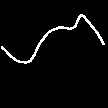

1it [00:00,  8.52it/s]

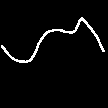

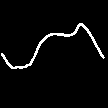

1054it [00:46, 22.85it/s]


In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import imageio
import cv2
from google.colab.patches import cv2_imshow

i = 0
images = []
for row in tqdm(data.iterrows()):
  fig, ax1 = plt.subplots(figsize = (2, 2))
  color = 'tab:red'
  ax1.set_ylim(min(data.iloc[:,0:48].min()), max(data.iloc[:,0:48].max()))
  ax1.plot(time, data.iloc[i,0:48], color=color)
  ax1.axes.xaxis.set_ticks([])
  ax1.axes.yaxis.set_ticks([])
  plt.savefig('image.png')
  im = imageio.imread('image.png')
  im.shape
  im = im[18:126, 21:129, 0:3] ## cropping image ##
  im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) ### coverts greyscale ###
  _,im = cv2.threshold(im,250,255,cv2.THRESH_BINARY_INV) ### applies threshold so values either 1 or 0 ###
  plt.close()
  images.append(im)
  i += 1
  if i <=3:   # Show a couple of examples
    cv2_imshow(im)

In [ ]:
images[0].shape

(108, 108)

In [ ]:
import torch 
from torchvision import transforms #Change to tensors

for i in range(len(images)):
  images[i] = np.expand_dims(images[i], axis = 0)
  images[i] = torch.as_tensor(images[i])

In [ ]:
images[0].shape

torch.Size([1, 108, 108])

In [ ]:
df = pd.DataFrame()
df['trade_date'], df['tensor'], df['cluster'] = data.trade_date, images, data.cluster

In [ ]:
df.head()

,trade_date,tensor,cluster
0,02/01/2019,"[[[tensor(0, dtype=torch.uint8), tensor(0, dty...",2
1,03/01/2019,"[[[tensor(0, dtype=torch.uint8), tensor(0, dty...",2
2,04/01/2019,"[[[tensor(0, dtype=torch.uint8), tensor(0, dty...",2
3,05/01/2019,"[[[tensor(0, dtype=torch.uint8), tensor(0, dty...",2
4,06/01/2019,"[[[tensor(0, dtype=torch.uint8), tensor(0, dty...",1


In [ ]:
df.tensor[0].shape

torch.Size([1, 108, 108])

In [ ]:
df.tensor[0]

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)

here need to swap axis as pytorch only support NCHW format (number in batch, number of channels, height, width) and current shape is HWC.

Then we divide by 255 to get the values for each pixel to be a float in the range 0 to 1. 

In [ ]:
import random 
rand_list = []
for i in range(len(df.tensor)):
  rand_list.append(random.random())

In [ ]:
train, test = [], []

for i, row in df.iterrows():
  if rand_list[i] <= 0.98:    # 98% of data used to train just so the other 2% can be used as pretend forcasts so test model later
    train.append((row[1].float(), row[0])) #adding trade date not for model but just for comparsion of results later
  else:
    test.append((row[1].float(), row[0]))

In [ ]:
print(len(train))
print(len(test))
print(train[0][0].shape)

1030
24
torch.Size([1, 108, 108])


Add data to dataloader so it can be iterated over by network

In [ ]:
from torch.utils.data import DataLoader

batch_size = 8

trainloader = DataLoader(train, batch_size = batch_size)
testloader = DataLoader(test, batch_size = batch_size)

One of the usual benefit of CNNs are their translational invariance. This is often a benefit but not in this case as a spike in wind energy in the morning is not equivalent to a spike in wind energy in the evening. To account for this I will now train a model using a similar model with the only difference being that it will include an additional coord conv layer



In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class AddCoords(nn.Module):

    def __init__(self, with_r=False):
        super().__init__()
        self.with_r = with_r

    def forward(self, input_tensor):
        """
        Args:
            input_tensor: shape(batch, channel, x_dim, y_dim)
        """
        batch_size, _, x_dim, y_dim = input_tensor.size()

        xx_channel = torch.arange(x_dim).repeat(1, y_dim, 1)
        yy_channel = torch.arange(y_dim).repeat(1, x_dim, 1).transpose(1, 2)

        xx_channel = xx_channel.float() / (x_dim - 1)
        yy_channel = yy_channel.float() / (y_dim - 1)

        xx_channel = xx_channel * 2 - 1
        yy_channel = yy_channel * 2 - 1

        xx_channel = xx_channel.repeat(batch_size, 1, 1, 1).transpose(2, 3)
        yy_channel = yy_channel.repeat(batch_size, 1, 1, 1).transpose(2, 3)

        ret = torch.cat([
            input_tensor,
            xx_channel.type_as(input_tensor),
            yy_channel.type_as(input_tensor)], dim=1)

        if self.with_r:
            rr = torch.sqrt(torch.pow(xx_channel.type_as(input_tensor) - 0.5, 2) + torch.pow(yy_channel.type_as(input_tensor) - 0.5, 2))
            ret = torch.cat([ret, rr], dim=1)

        return ret


class CoordConv(nn.Module):

    def __init__(self, in_channels, out_channels, with_r=False, **kwargs):
        super().__init__()
        self.addcoords = AddCoords(with_r=with_r)
        in_size = in_channels+2
        if with_r:
            in_size += 1
        self.conv = nn.Conv2d(in_size, out_channels, **kwargs)

    def forward(self, x):
        ret = self.addcoords(x)
        ret = self.conv(ret)
        return ret

Creating Autoencoder Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class cnnAE(nn.Module):

  def __init__(self):
    super(cnnAE, self).__init__()

    # Encoding Layers #
    self.coordconv = CoordConv(1, 1, kernel_size = 1)
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride =1, padding =1) # (8, 54, 54)
    self.pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2) # (8, 27, 27)
    self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride =1, padding =1) # (16, 27, 27)
    self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride =1, padding =1)
    self.pool2 = nn.MaxPool2d(kernel_size = 3, stride = 3) # (16, 9, 9)
    # Decoding Layers #
    self.t_conv1 = nn.ConvTranspose2d(in_channels=64, out_channels=32, stride=3, kernel_size=3) # (16, 27, 27)
    self.t_conv2 = nn.ConvTranspose2d(in_channels=32, out_channels=16, stride=1, kernel_size=3, padding =1) # (8, 54, 54)
    self.t_conv3 = nn.ConvTranspose2d(in_channels=16, out_channels=1, stride=2, kernel_size=2) # (1, 108, 108)

  def forward(self, x):
    
    ## Encoding ##
    x = self.coordconv(x) 
    x = self.pool1(F.relu(self.conv1(x)))
    x = self.pool2(F.relu(self.conv2(x)))
    emb = F.relu(self.conv3(x))
    # Decoding ##
    x = F.relu(self.t_conv1(emb))
    x = F.relu(self.t_conv2(x))
    # output layer (with sigmoid for scaling from 0 to 1)
    x = torch.sigmoid(self.t_conv3(x))

    return x, emb

model = cnnAE()

Function for training model

In [ ]:
def train_autoencoder(model, trainloader, num_epochs=100, learning_rate=1e-3):
    encoder_loss = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    trainloss = 0.0
    epochs, losses = [], []


    for epoch in tqdm(range(num_epochs)):   
      for input, _ in trainloader:
          
          #forward pass
          optimizer.zero_grad()
          dec, _ = model(input)
          loss = encoder_loss(dec, input)
          
          #back propagation
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()            
            
      losses.append(float(loss))     
      


    # plotting
    plt.title("Training Curve")
    plt.plot(losses, label="Train")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

In [ ]:
print(model)

cnnAE(
  (coordconv): CoordConv(
    (addcoords): AddCoords()
    (conv): Conv2d(3, 1, kernel_size=(1, 1), stride=(1, 1))
  )
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (t_conv1): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(3, 3))
  (t_conv2): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (t_conv3): ConvTranspose2d(16, 1, kernel_size=(2, 2), stride=(2, 2))
)


100%|██████████| 20/20 [08:16<00:00, 24.80s/it]


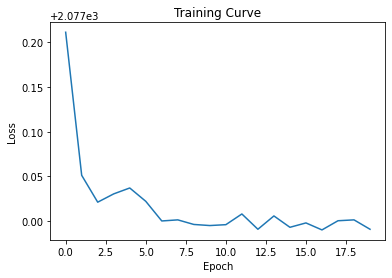

In [ ]:
train_autoencoder(model, trainloader, num_epochs=20)


Using selection of 2% of data left out for visual verification that the model is working

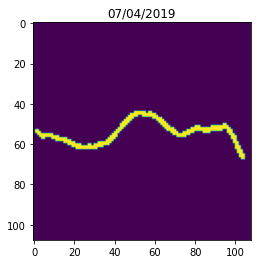

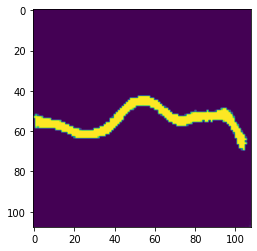

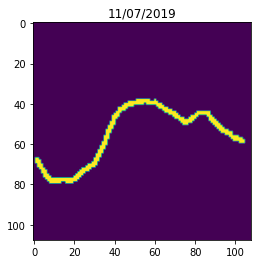

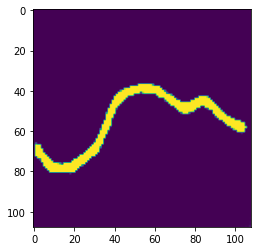

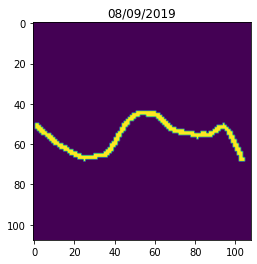

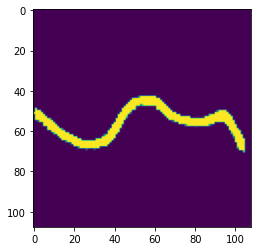

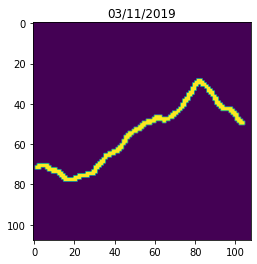

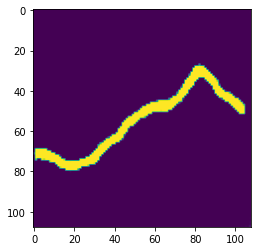

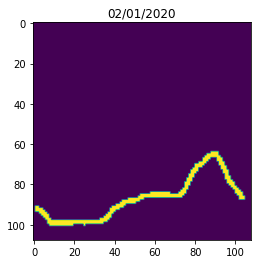

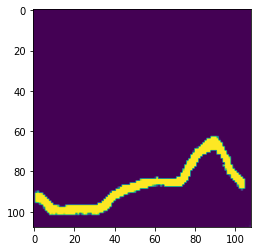

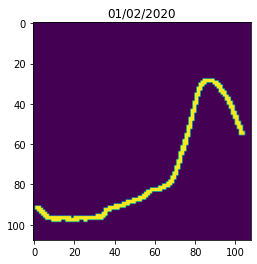

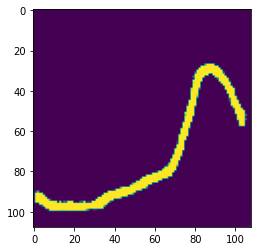

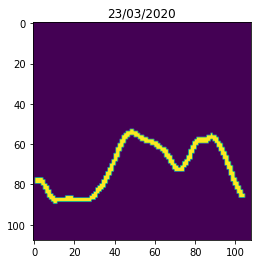

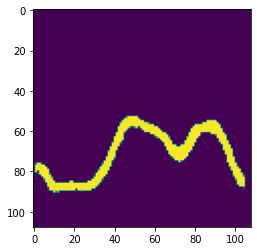

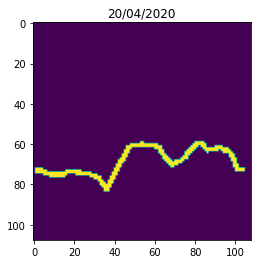

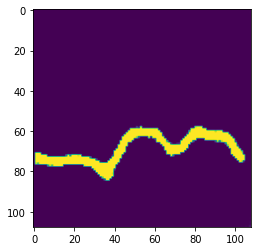

In [ ]:
dataiter = iter(testloader)
for i in range(1):
  input, trade_date = dataiter.next()
  output, emb = model(input)
  for i in range(len(output)):
    plt.imshow(input[i].detach().numpy().squeeze())
    plt.title(trade_date[i])
    plt.show()
    plt.close()
    plt.imshow(output[i].detach().numpy().squeeze())
    plt.show()
    plt.close()

Use extracted features from the trained autoencoder to train a knn classifier then can use this to find similar days from forcasts

In [ ]:
from sklearn.neighbors import NearestNeighbors

def create_embeddings(dataloader): # Creates embeddings of important features taken from bottleneck layer of autoencoder
  embeddings = []
  dates = []
  dataiter = iter(dataloader)
  with torch.no_grad():
    for i in range(len(trainloader)):
      input, trade_date = dataiter.next()
      output, emb = model(input)
      for j in range(len(emb)):
        embeddings.append(emb[j].detach().flatten().numpy())
        dates.append(trade_date[j])
  return embeddings, dates

def find_similar_days(num_days, num_examples, trainloader, testloader, plot = True):
  embeddings, dates = create_embeddings(trainloader)

  similar_days = NearestNeighbors(n_neighbors = num_days) # Uses embeddings to train Nearest Neighbours classifier
  similar_days.fit(embeddings)

  test_embs = []
  test_dates = []

  testiter = iter(testloader)       # Takes data not used in training (example of forcast data)
  with torch.no_grad():
    for i in range(len(testloader)):
      input, trade_date = testiter.next()
      output, emb = model(input)        # Takes forcast and extracts important features from bottleneck of autoencoder
      for j in range(len(output)):
        test_embs.append(emb[j].detach().flatten().numpy())
        test_dates.append(trade_date[j])
  random_sample = random.sample(range(len(test_embs)), num_examples)
  np_test_embs = np.array(test_embs)
  np_test_dates = np.array(test_dates)
  sample_test_embs = list(np_test_embs[random_sample])
  sample_test_dates = list(np_test_dates[random_sample])

  for i in range(len(sample_test_embs)):
    dis_mat, idx = similar_days.kneighbors([sample_test_embs[i]], return_distance=True)   # Returns the similar days 
    dis_mat = dis_mat.flatten()
    idx = idx.flatten()

    sim_days = []
    similarity = []
    for id in idx:
      sim_days.append(dates[id])
      similarity.append(cal_similarity(data[data.trade_date == sample_test_dates[i]].iloc[0,0:48], data[data.trade_date == dates[id]].iloc[0,0:48]))


    if plot == True:    # if plot == True takes the similar 
      j = 0
      odata = pd.read_csv('odata')
      odata.drop('Unnamed: 0', axis =1, inplace = True)    
      time = odata['Start.Time.30.Minute.Period']
      time = time[0:48]

      plt.rcParams["figure.figsize"] = (12, 8)
      plt.style.use('ggplot')
      plt.plot(time, data[data.trade_date == sample_test_dates[i]].iloc[0,0:48], label = "".join(["Test Day:", sample_test_dates[i]]), linewidth=4) # forcast in bold
      for id in idx:
        plt.plot(time, data[data.trade_date == dates[id]].iloc[0,0:48], label = "".join(["Date:", dates[id], ", Similarity: ", str(cal_similarity(data[data.trade_date == sample_test_dates[i]].iloc[0,0:48], data[data.trade_date == dates[id]].iloc[0,0:48])), "%"])) #Calculate similarity matrix
        j += 1
      plt.legend(loc='best')
      plt.xticks(range(0,48,2), rotation=45)
      plt.ylabel("Net Demand")
      plt.xlabel("Start Time 30 Minute Period")
      plt.show()
      plt.close()

def cal_similarity(y_true, y_pred):
    return round((1 - np.sqrt(np.nanmean(np.square(((y_true - y_pred) / y_true)))))*100, 2)      ###  100(1 - Root Mean Square Percentage Error)  Used as similarity matrix

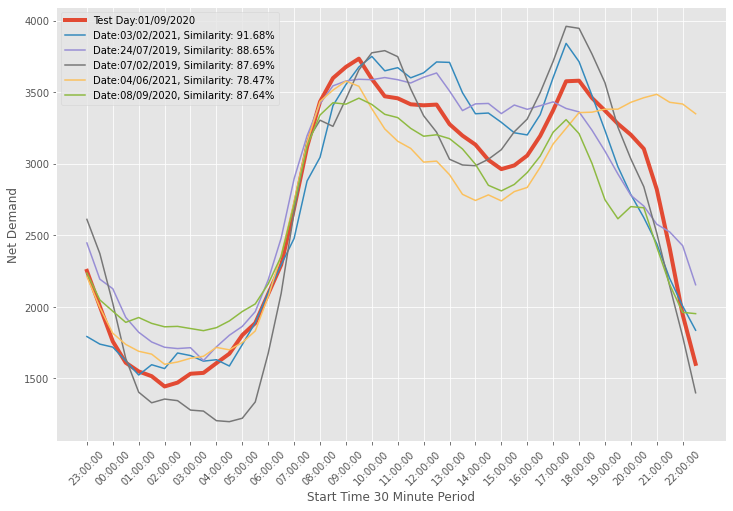

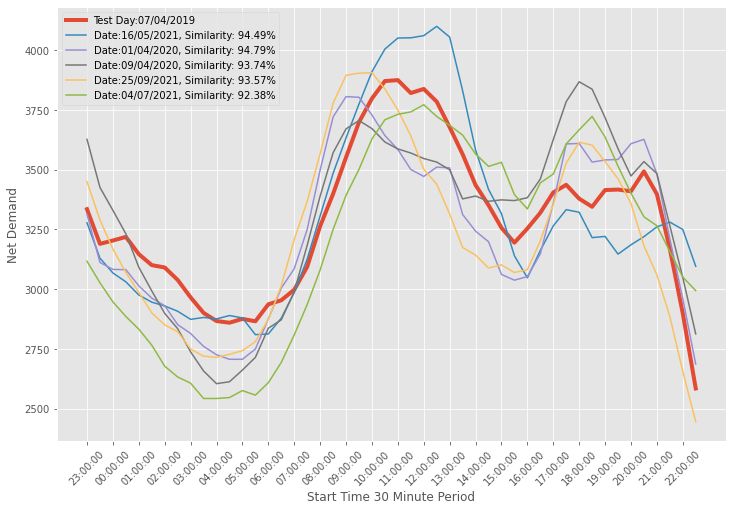

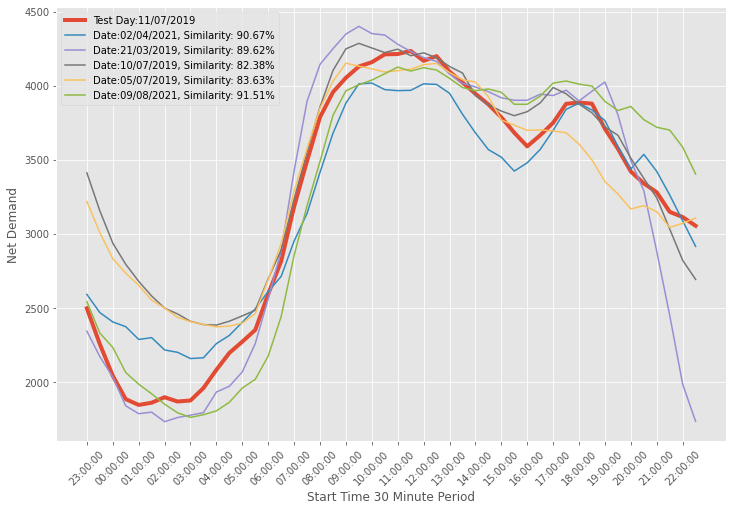

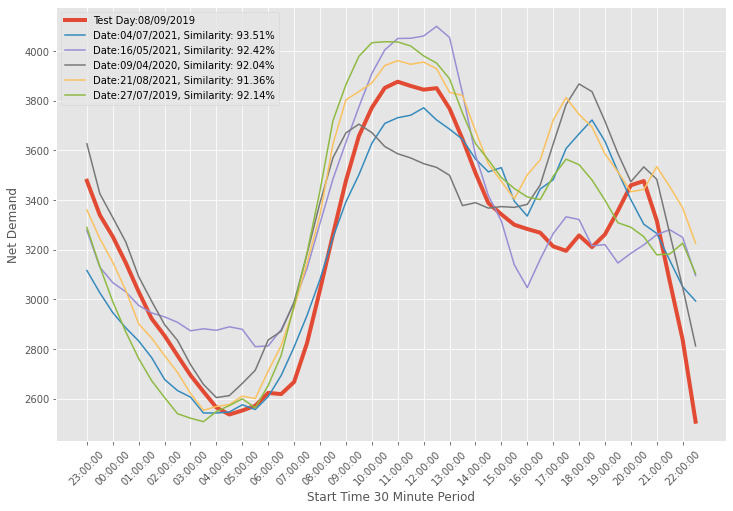

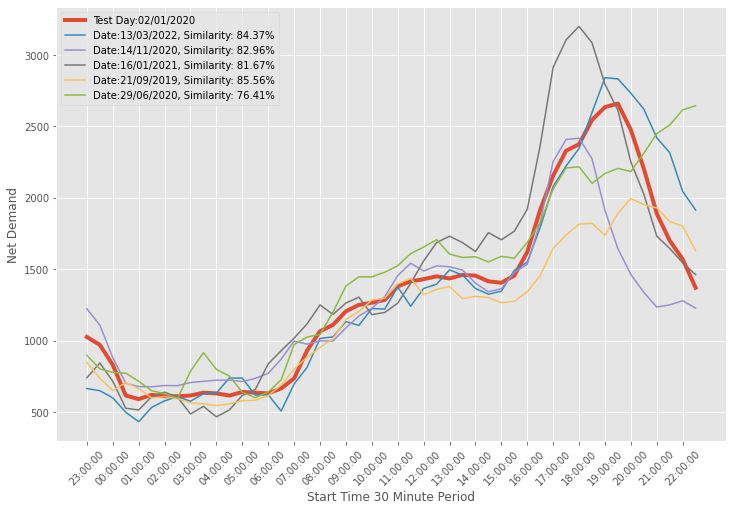

In [ ]:
find_similar_days(num_days = 5, num_examples = 5, trainloader = trainloader, testloader = testloader)